<a href="https://colab.research.google.com/github/Amalia-zam/Portfolio/blob/main/Students_Daily_Attendance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import seaborn as sns

In [3]:
# Import your df
df = pd.read_csv('2018-2019_Daily_Attendance_20240429.csv')
df

,School DBN,Date,Enrolled,Absent,Present,Released
0,01M015,20180905,172,19,153,0
1,01M015,20180906,171,17,154,0
2,01M015,20180907,172,14,158,0
3,01M015,20180912,173,7,166,0
4,01M015,20180913,173,9,164,0
...,...,...,...,...,...,...
277148,79X695,20190620,230,46,136,48
277149,79X695,20190621,226,53,128,45
277150,79X695,20190624,226,42,130,54
277151,79X695,20190625,226,56,127,43


In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')
df

,School DBN,Date,Enrolled,Absent,Present,Released
0,01M015,2018-09-05,172,19,153,0
1,01M015,2018-09-06,171,17,154,0
2,01M015,2018-09-07,172,14,158,0
3,01M015,2018-09-12,173,7,166,0
4,01M015,2018-09-13,173,9,164,0
...,...,...,...,...,...,...
277148,79X695,2019-06-20,230,46,136,48
277149,79X695,2019-06-21,226,53,128,45
277150,79X695,2019-06-24,226,42,130,54
277151,79X695,2019-06-25,226,56,127,43


In [5]:
df.head()

,School DBN,Date,Enrolled,Absent,Present,Released
0,01M015,2018-09-05,172,19,153,0
1,01M015,2018-09-06,171,17,154,0
2,01M015,2018-09-07,172,14,158,0
3,01M015,2018-09-12,173,7,166,0
4,01M015,2018-09-13,173,9,164,0


In [6]:
#shape of the data
df.shape

(277153, 6)

In [7]:
#check if there are any duplicated rows
df.duplicated().sum()

0

In [8]:
# Check for missing values
print(df.isnull().sum())

School DBN    0
Date          0
Enrolled      0
Absent        0
Present       0
Released      0
dtype: int64


In [9]:
#data types of the columns
df.dtypes

School DBN            object
Date          datetime64[ns]
Enrolled               int64
Absent                 int64
Present                int64
Released               int64
dtype: object

In [10]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277153 entries, 0 to 277152
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   School DBN  277153 non-null  object        
 1   Date        277153 non-null  datetime64[ns]
 2   Enrolled    277153 non-null  int64         
 3   Absent      277153 non-null  int64         
 4   Present     277153 non-null  int64         
 5   Released    277153 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 12.7+ MB


In [11]:
#statistical measures about the data
df.describe()

,Date,Enrolled,Absent,Present,Released
count,277153,277153.00000,277153.000000,277153.000000,277153.000000
mean,2019-01-28 12:18:24.343088128,596.98617,50.503538,544.499403,1.983229
min,2018-09-04 00:00:00,1.00000,0.000000,1.000000,0.000000
25%,2018-11-13 00:00:00,329.00000,23.000000,291.000000,0.000000
50%,2019-01-29 00:00:00,476.00000,38.000000,430.000000,0.000000
75%,2019-04-10 00:00:00,684.00000,59.000000,640.000000,0.000000
max,2019-06-26 00:00:00,5955.00000,2151.000000,5847.000000,5904.000000
std,NaN,482.90966,54.329671,452.970313,35.114511


In [12]:
# Menyimpan dfframe yang telah diproses ke dalam file CSV
output_file = "Preprocessed_Daily_Attendance.csv"
df.to_csv(output_file, index=False)
print(f"\ndf telah diproses dan disimpan di {output_file}.")


df telah diproses dan disimpan di Preprocessed_Daily_Attendance.csv.


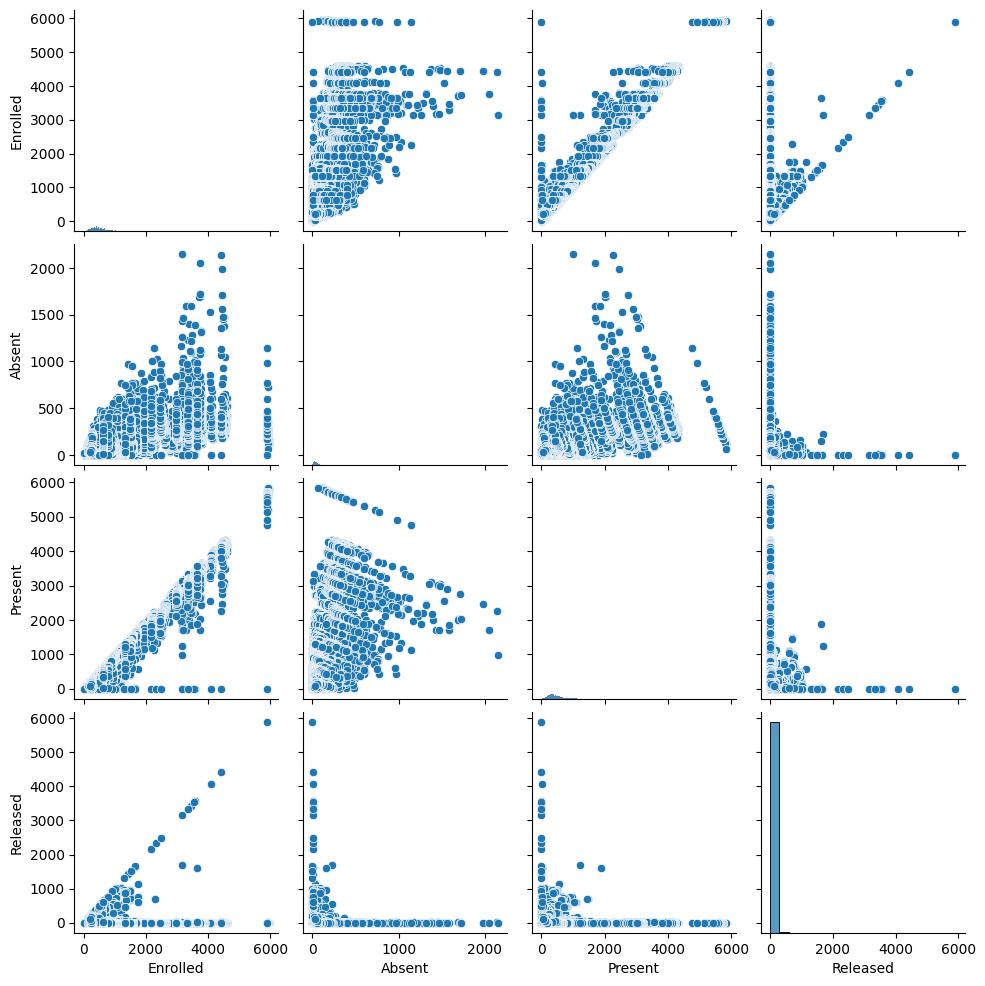

In [13]:
sns.pairplot(df)

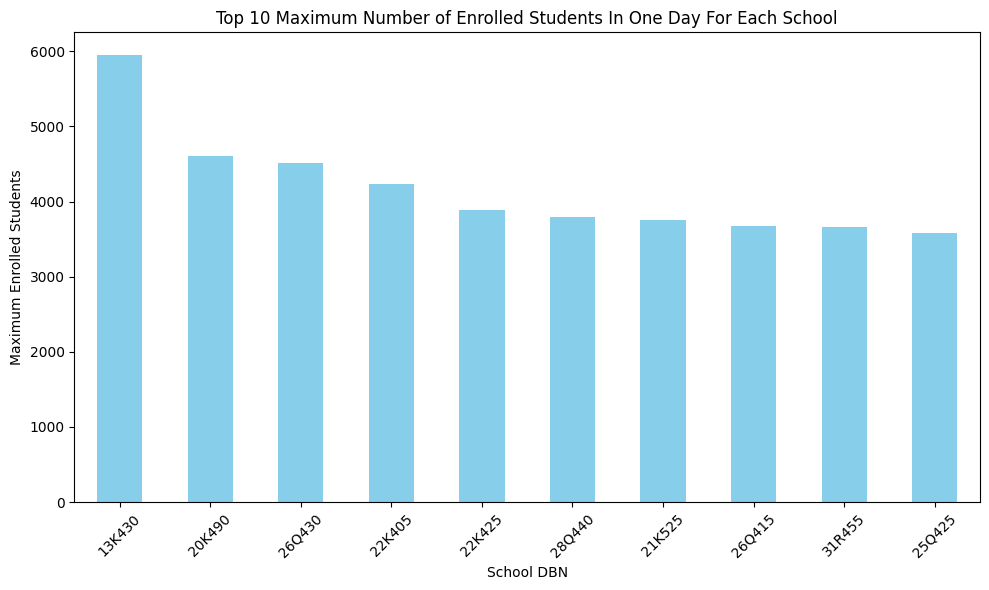

In [14]:
#group by 'School DBN' and find the maximum enrollment for each school
max_enrollment_by_school = df.groupby('School DBN')['Enrolled'].max()

#sort the Series by maximum enrollment in descending order
max_enrollment_by_school_sorted = max_enrollment_by_school.sort_values(ascending = False)

#take the top 10 schools
top_10_schools = max_enrollment_by_school_sorted.head(10)

#plotting
plt.figure(figsize = (10, 6))
top_10_schools.plot(kind = 'bar', color = 'skyblue')
plt.title('Top 10 Maximum Number of Enrolled Students In One Day For Each School')
plt.xlabel('School DBN')
plt.ylabel('Maximum Enrolled Students')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

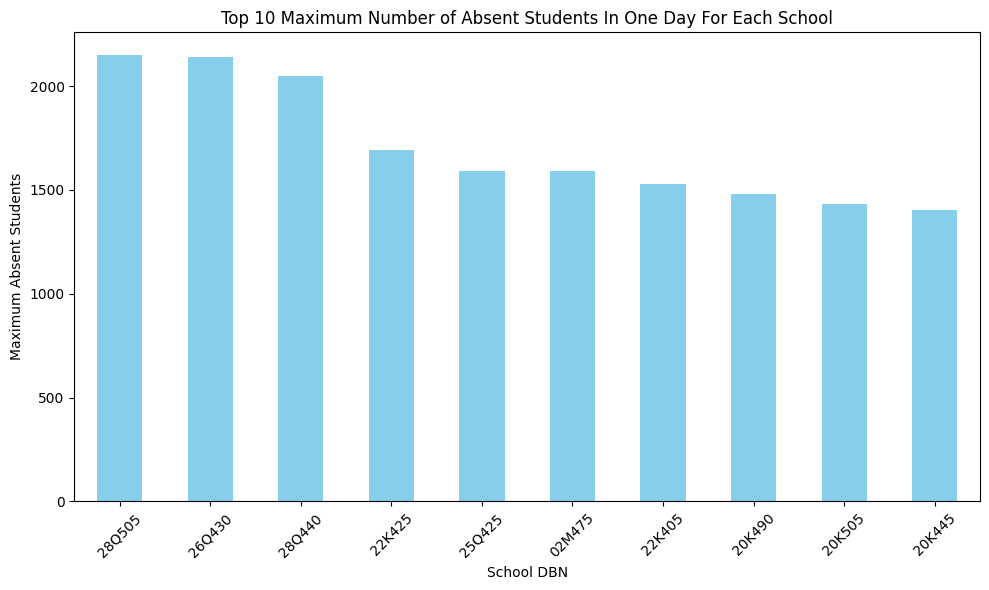

In [15]:
#group by 'School DBN' and find the maximum Absence for each school
max_absence_by_school = df.groupby('School DBN')['Absent'].max()

#sort the Series by maximum enrollment in descending order
max_absence_by_school_sorted = max_absence_by_school.sort_values(ascending = False)

#take the top 10 schools
top_10_schools = max_absence_by_school_sorted.head(10)

#plotting
plt.figure(figsize = (10, 6))
top_10_schools.plot(kind = 'bar', color = 'skyblue')
plt.title('Top 10 Maximum Number of Absent Students In One Day For Each School')
plt.xlabel('School DBN')
plt.ylabel('Maximum Absent Students')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

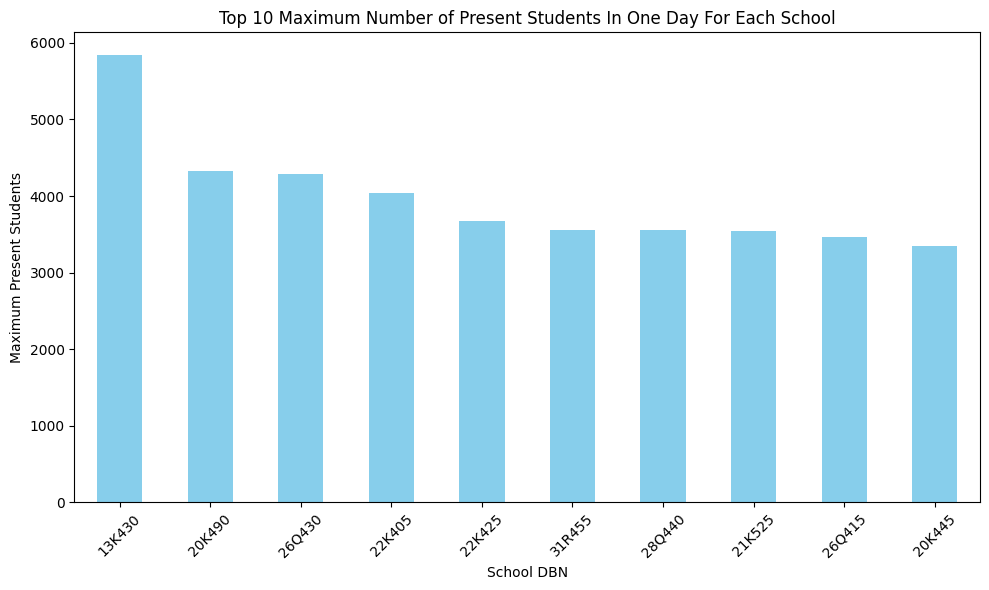

In [16]:
#group by 'School DBN' and find the maximum present for each school
max_presence_by_school = df.groupby('School DBN')['Present'].max()

#sort the Series by maximum presence in descending order
max_presence_by_school_sorted = max_presence_by_school.sort_values(ascending = False)

#take the top 10 schools
top_10_schools = max_presence_by_school_sorted.head(10)

#plotting
plt.figure(figsize = (10, 6))
top_10_schools.plot(kind = 'bar', color = 'skyblue')
plt.title('Top 10 Maximum Number of Present Students In One Day For Each School')
plt.xlabel('School DBN')
plt.ylabel('Maximum Present Students')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

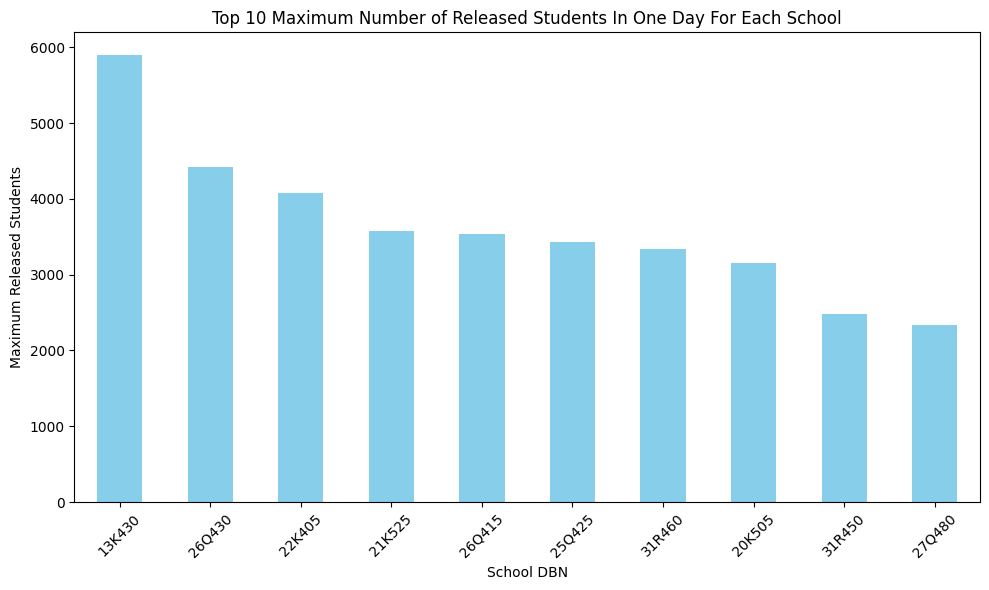

In [17]:
#group by 'School DBN' and find the maximum release for each school
max_release_by_school = df.groupby('School DBN')['Released'].max()

#sort the Series by maximum release in descending order
max_release_by_school_sorted = max_release_by_school.sort_values(ascending = False)

#take the top 10 schools
top_10_schools = max_release_by_school_sorted.head(10)

#plotting
plt.figure(figsize = (10, 6))
top_10_schools.plot(kind = 'bar', color = 'skyblue')
plt.title('Top 10 Maximum Number of Released Students In One Day For Each School')
plt.xlabel('School DBN')
plt.ylabel('Maximum Released Students')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [18]:
df['Date'] = pd.to_datetime(df['Date'])

In [19]:
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month

In [20]:
df

,School DBN,Date,Enrolled,Absent,Present,Released,year,month
0,01M015,2018-09-05,172,19,153,0,2018,9
1,01M015,2018-09-06,171,17,154,0,2018,9
2,01M015,2018-09-07,172,14,158,0,2018,9
3,01M015,2018-09-12,173,7,166,0,2018,9
4,01M015,2018-09-13,173,9,164,0,2018,9
...,...,...,...,...,...,...,...,...
277148,79X695,2019-06-20,230,46,136,48,2019,6
277149,79X695,2019-06-21,226,53,128,45,2019,6
277150,79X695,2019-06-24,226,42,130,54,2019,6
277151,79X695,2019-06-25,226,56,127,43,2019,6


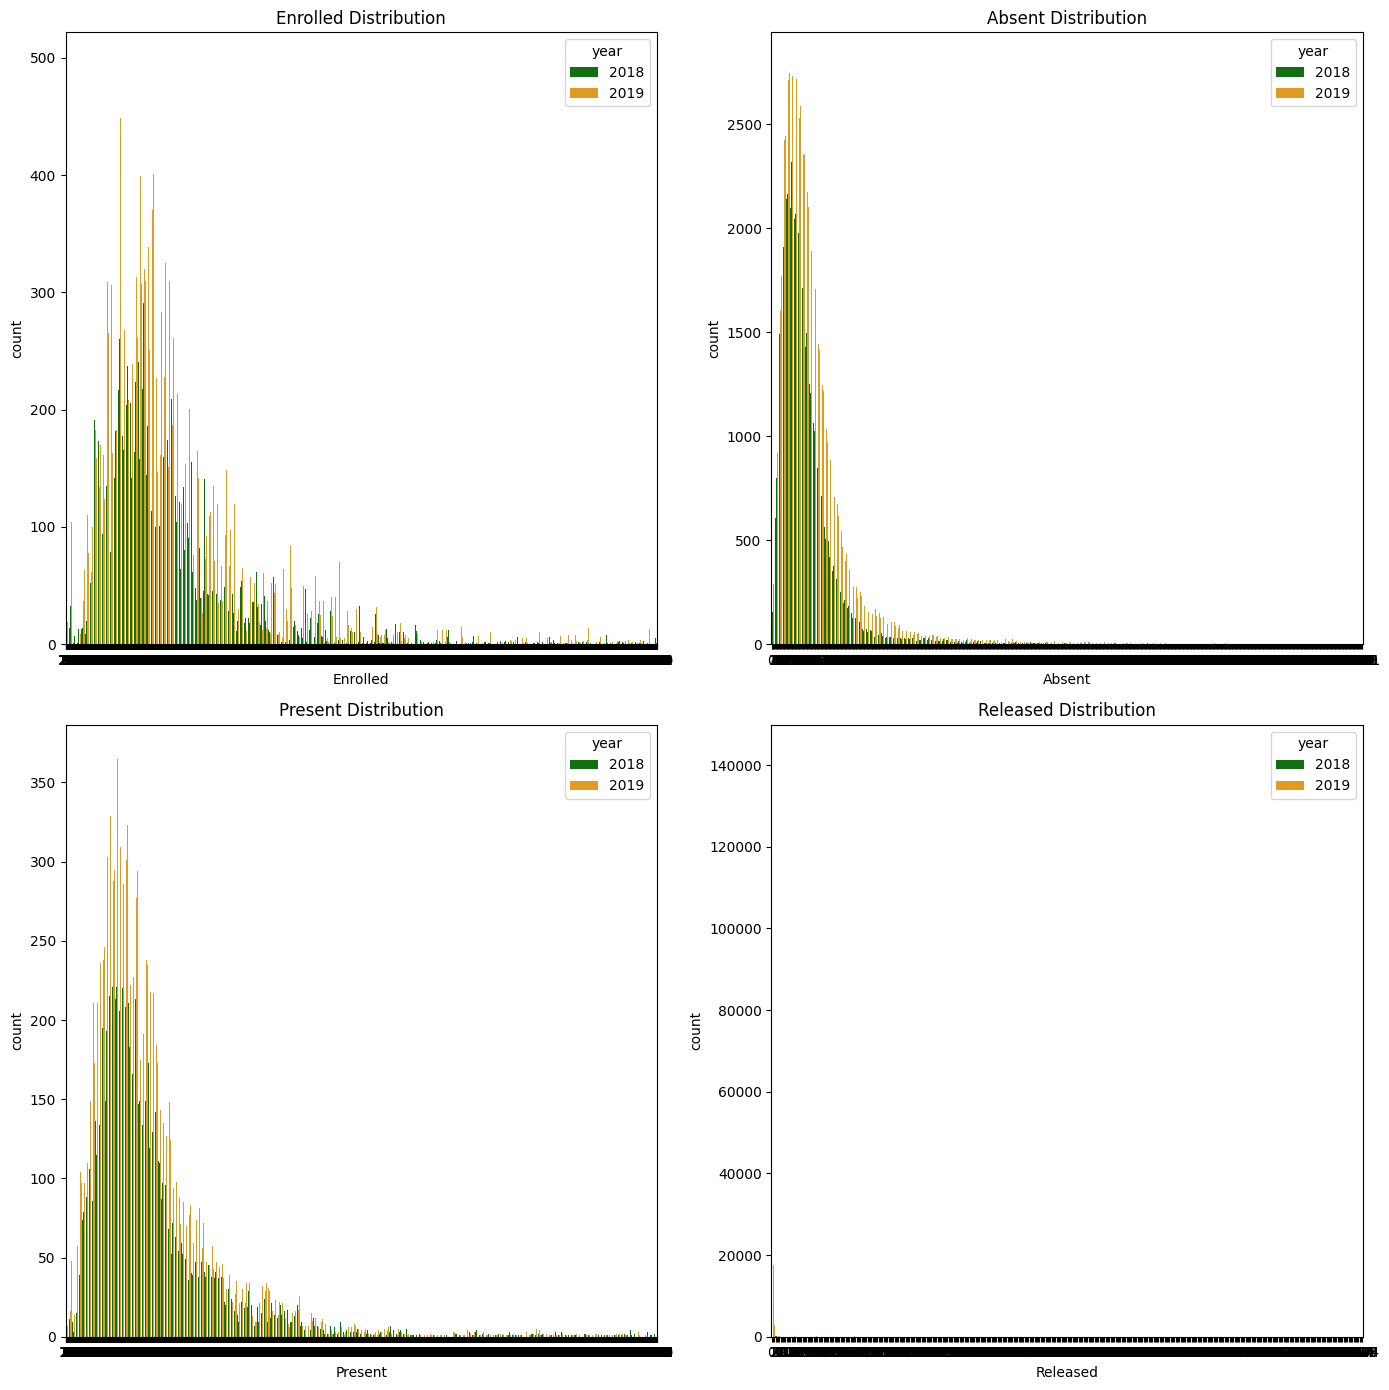

In [21]:
years = df['year'].unique()

custom_palette = {year: 'green' if i % 2 == 0 else 'orange' for i, year in enumerate(years)}

fig, ax = plt.subplots(2, 2, figsize=(14, 14))

sns.countplot(x='Enrolled', hue='year', data=df, ax=ax[0, 0], palette=custom_palette)
ax[0, 0].set_title('Enrolled Distribution')

sns.countplot(x='Absent', hue='year', data=df, ax=ax[0, 1], palette=custom_palette)
ax[0, 1].set_title('Absent Distribution')

sns.countplot(x='Present', hue='year', data=df, ax=ax[1, 0], palette=custom_palette)
ax[1, 0].set_title('Present Distribution')

sns.countplot(x='Released', hue='year', data=df, ax=ax[1, 1], palette=custom_palette)
ax[1, 1].set_title('Released Distribution')

plt.tight_layout()
plt.show()

   year  month    Enrolled     Absent     Present  Attendance_Rate  \
0  2018      9  598.300363  42.869551  555.273505        92.808486   
1  2018     10  599.204033  38.715798  560.266252        93.501749   
2  2018     11  598.802173  48.579486  549.965962        91.844350   
3  2018     12  598.288704  49.443858  548.606313        91.695917   
4  2019      1  594.843768  57.536900  532.175609        89.464770   
5  2019      2  597.310067  49.782334  546.681253        91.523864   
6  2019      3  597.172589  48.138451  546.751093        91.556629   
7  2019      4  596.940141  46.712178  549.887166        92.117639   
8  2019      5  596.905006  51.010737  545.494631        91.387177   
9  2019      6  590.819865  79.260617  499.887631        84.609144   

   Absence_Rate  
0      7.165222  
1      6.461205  
2      8.112777  
3      8.264214  
4      9.672607  
5      8.334421  
6      8.061062  
7      7.825270  
8      8.545872  
9     13.415361  


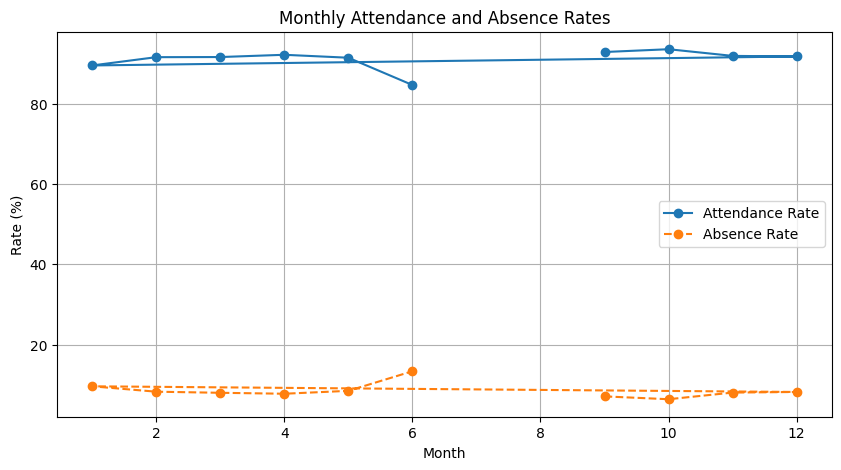

In [22]:
# Menghitung rata-rata kehadiran bulanan
monthly_attendance = df.groupby(['year', 'month']).agg({
    'Enrolled': 'mean',
    'Absent': 'mean',
    'Present': 'mean'
}).reset_index()

# Menghitung persentase kehadiran dan ketidakhadiran
monthly_attendance['Attendance_Rate'] = (monthly_attendance['Present'] / monthly_attendance['Enrolled']) * 100
monthly_attendance['Absence_Rate'] = (monthly_attendance['Absent'] / monthly_attendance['Enrolled']) * 100

# Menampilkan hasil segmentasi
print(monthly_attendance)

# Visualisasi kehadiran bulanan
plt.figure(figsize=(10, 5))
plt.plot(monthly_attendance['month'], monthly_attendance['Attendance_Rate'], marker='o', label='Attendance Rate')
plt.plot(monthly_attendance['month'], monthly_attendance['Absence_Rate'], marker='o', label='Absence Rate', linestyle='--')
plt.title('Monthly Attendance and Absence Rates')
plt.xlabel('Month')
plt.ylabel('Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
from sklearn.cluster import KMeans

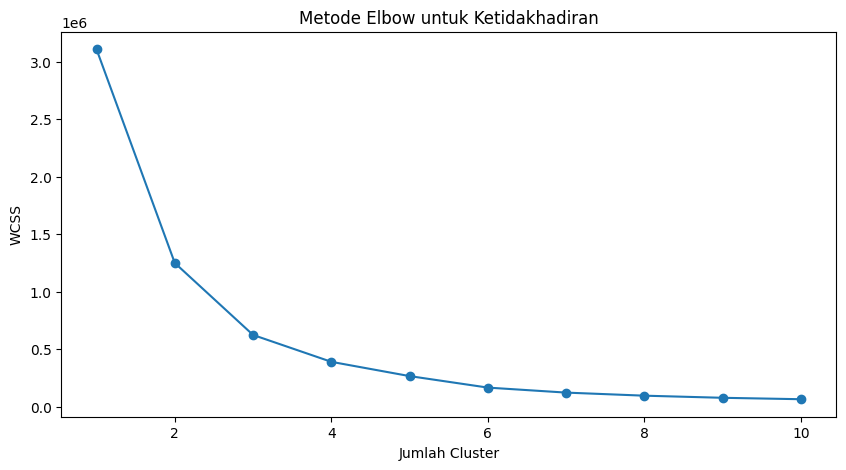

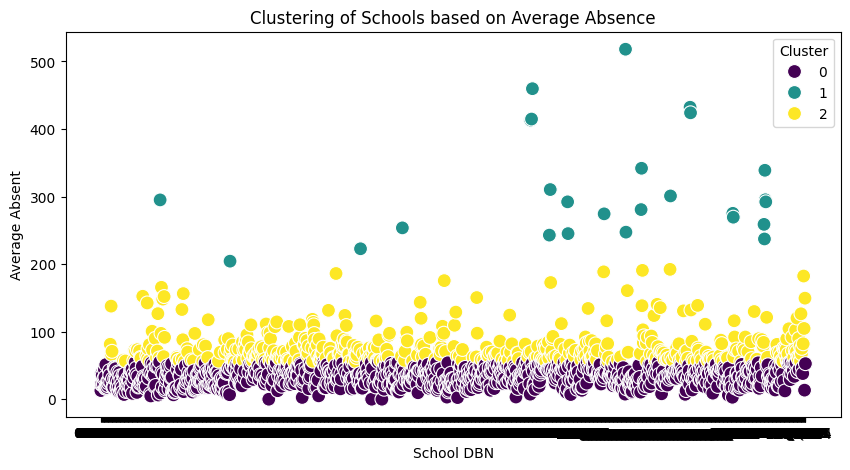

In [24]:
# Menghitung rata-rata ketidakhadiran untuk setiap School DBN
average_absent = df.groupby('School DBN')['Absent'].mean().reset_index()
average_absent.columns = ['School DBN', 'Average Absent']

# Menyiapkan data untuk clustering
X_absent = average_absent[['Average Absent']]

# Menentukan jumlah cluster yang optimal dengan metode elbow
wcss_absent = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_absent)
    wcss_absent.append(kmeans.inertia_)

# Plot untuk metode elbow
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss_absent, marker='o')
plt.title('Metode Elbow untuk Ketidakhadiran')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

# Menggunakan jumlah cluster yang optimal (misalnya 3 cluster berdasarkan elbow plot)
kmeans_absent = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
average_absent['Cluster'] = kmeans_absent.fit_predict(X_absent)

# Visualisasi hasil clustering
plt.figure(figsize=(10, 5))
sns.scatterplot(data=average_absent, x='School DBN', y='Average Absent', hue='Cluster', palette='viridis', s=100)
plt.title('Clustering of Schools based on Average Absence')
plt.xlabel('School DBN')
plt.ylabel('Average Absent')
plt.legend(title='Cluster')
plt.show()


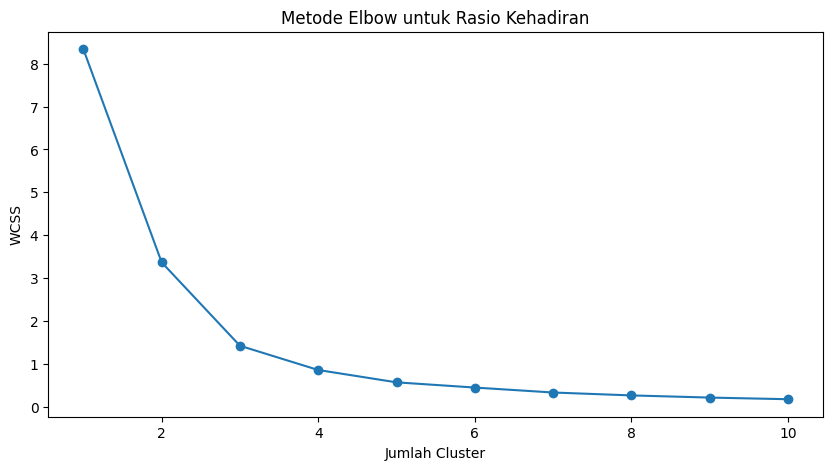

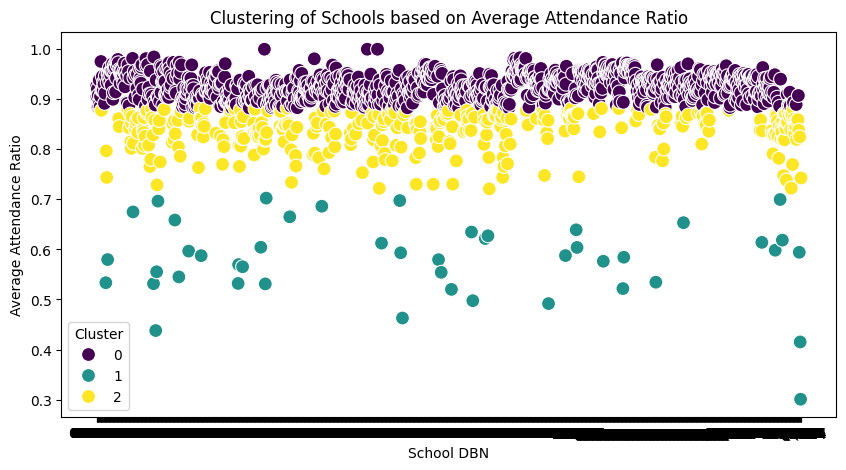

In [25]:
# Menghitung rasio kehadiran untuk setiap School DBN
df['Attendance Ratio'] = df['Present'] / df['Enrolled']
average_ratio = df.groupby('School DBN')['Attendance Ratio'].mean().reset_index()
average_ratio.columns = ['School DBN', 'Average Attendance Ratio']

# Menyiapkan data untuk clustering
X_ratio = average_ratio[['Average Attendance Ratio']]

# Menentukan jumlah cluster yang optimal menggunakan metode elbow
wcss_ratio = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_ratio)
    wcss_ratio.append(kmeans.inertia_)

# Plot untuk metode elbow
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss_ratio, marker='o')
plt.title('Metode Elbow untuk Rasio Kehadiran')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

# Dengan 3 kluster
kmeans_ratio = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
average_ratio['Cluster'] = kmeans_ratio.fit_predict(X_ratio)

# Visualisasi hasil clustering
plt.figure(figsize=(10, 5))
sns.scatterplot(data=average_ratio, x='School DBN', y='Average Attendance Ratio', hue='Cluster', palette='viridis', s=100)
plt.title('Clustering of Schools based on Average Attendance Ratio')
plt.xlabel('School DBN')
plt.ylabel('Average Attendance Ratio')
plt.legend(title='Cluster')
plt.show()


In [27]:
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

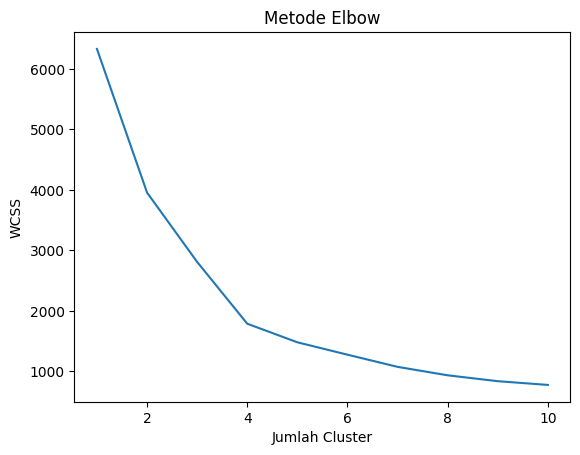

  School DBN  Enrolled_mean  Enrolled_std  Absent_mean  Absent_std  \
0     01M015     173.640449      1.459411    12.797753    8.107581   
1     01M019     252.775281      3.055985    22.353933   14.273499   
2     01M020     481.314607      2.810776    38.224719   19.134819   
3     01M034     308.426966      2.891201    35.443820   21.997424   
4     01M063     230.920904      2.317047    21.079096   11.664557   

   Present_mean  Present_std  Released_mean  Released_std  Cluster  
0    160.724719     8.295227       0.117978      1.111121        0  
1    228.898876    22.473359       1.522472     18.539987        0  
2    443.089888    19.101655       0.000000      0.000000        0  
3    272.775281    21.571719       0.207865      1.699633        0  
4    209.666667    11.828157       0.175141      1.962099        0  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
# Menghitung statistik harian per sekolah
school_stats = df.groupby('School DBN').agg({
    'Enrolled': ['mean', 'std'],
    'Absent': ['mean', 'std'],
    'Present': ['mean', 'std'],
    'Released': ['mean', 'std']
}).reset_index()

school_stats.columns = ['School DBN', 'Enrolled_mean', 'Enrolled_std', 'Absent_mean', 'Absent_std', 'Present_mean', 'Present_std', 'Released_mean', 'Released_std']

# Kolom untuk clustering
X = school_stats[['Enrolled_mean', 'Absent_mean', 'Present_mean', 'Released_mean']]

# Standardisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menentukan jumlah cluster menggunakan metode elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot elbow method
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

# Menentukan jumlah cluster = 3
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
school_stats['Cluster'] = kmeans.fit_predict(X_scaled)

# Menyimpan hasil clustering ke file baru
school_stats.to_csv('school_clustering_result.csv', index=False)

print(school_stats.head())


In [29]:
!pip install scikit-optimize

Confusion Matrix:
[[145622      1]
 [     0  76099]]


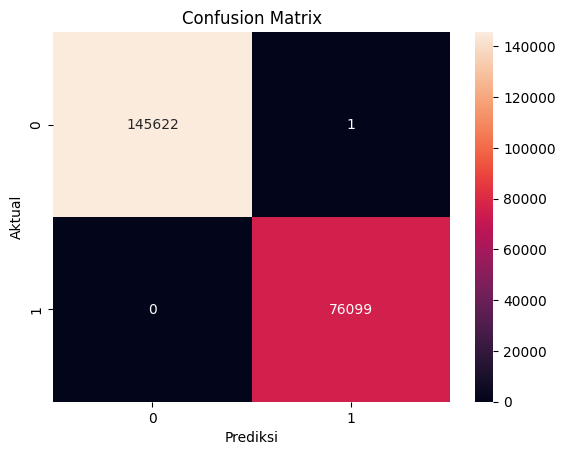

Akurasi: 0.9999954898476471


In [47]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Menambahkan fitur kategorikal berdasarkan rata-rata kehadiran
df['Above_Average_Presence'] = (df['Present'] > df['Present'].mean()).astype(int)

# Pilih fitur-fitur yang relevan untuk model klasifikasi
X = df[['Enrolled', 'Absent', 'Released']]
y = df['Above_Average_Presence']

# Data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model Regresi Logistik
model = LogisticRegression()

# Cross validation
y_pred_cv = cross_val_predict(model, X_train, y_train, cv=5)

# Evaluasi model dengan confusion matrix
cm = confusion_matrix(y_train, y_pred_cv)
print("Confusion Matrix:")
print(cm)

# Visualisasi confusion matrix
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

# Evaluasi kinerja model dengan akurasi
accuracy = accuracy_score(y_train, y_pred_cv)
print("Akurasi:", accuracy)
